# Realizacja część 1
** Przygotował:**
Paweł Jan Tłusty

IDE: jupyter studio + IRKernel

Export do pdf: pandoc

```bash
sudo apt-get install texlive texlive-latex-extra pandoc texlive-xetex
```
** Wersja online:**
Notes dostępny również w serwisie GitHub (niektóre wykresy niewłaściwie dzedziczą style, zaleca zaleca się jasny motyw lub otwieranie poszczególnych wykresów jako obraz w nowej karcie)


W związku z konwertowaniem notatnika jpt do innych formatów miejscami może zdarzyć się błędne kodowanie znaków specjalnych, w niniejszym dokumencie zakładamy, że wspominajac o **braku podstaw do odrzucenia hipotezy** ..., przyjmujemy domyślnie, że mówimy o hipotezie zerowej.



## Zadanie 1
Liczba strzelonych bramek w kolejnych meczach przez pewną drużynę
piłkarską jest następująca:

---

2, 3, 0, 0, 1, 3, 1, 0, 2, 0, 1, 1, 1, 0, 3, 2, 0, 2, 0, 1, 1, 2, 0, 3, 1, 1,
0, 1, 0, 2, 4, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2

---

Zbadać, czy ilość zdobytych goli w meczu jest zgodna z rozkładem
Poissona. Parametry rozkładu oszacować na podstawie danych.


### Hipotezy statystyczne:
- **H₀ (hipoteza zerowa):** rozkład liczby goli jest zgodny z rozkładem Poissona.
- **H₁ (hipoteza alternatywna):** rozkład liczby goli nie jest zgodny z rozkładem Poissona.


In [1]:
gole <- c(2, 3, 0, 0, 1, 3, 1, 0, 2, 0, 1, 1, 1, 0, 3, 2, 0, 2, 0, 1, 1, 2, 0, 3,
          1, 1, 0, 1, 0, 2, 4, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2)

In [2]:
n <- length(gole)

In [3]:
n

[1] 43

In [4]:
# Oszacowanie parametru λ dla rozkładu Poissona
lambda_hat <- mean(gole)

In [5]:
lambda_hat

[1] 1.093023

In [6]:
## Dane empiryczne
### Ile razy występuje dana liczba goli
obs <- table(gole)
obs

gole
 0  1  2  3  4 
15 15  8  4  1 

In [7]:
k <- 0:max(gole)

In [8]:
k

[1] 0 1 2 3 4

In [9]:
# Teoretyczne prawdopodobieństwa z rozkładu Poissona
probs <- dpois(k, lambda_hat)

In [10]:
probs

[1] 0.33520156 0.36638310 0.20023262 0.07295297 0.01993482

In [11]:
# Oczekiwane liczności
exp <- probs * n
names(exp) <- k

exp

0          1          2          3          4 
14.4136671 15.7544733  8.6100029  3.1369778  0.8571974

In [12]:
## Wizualizacja
df <- data.frame(
  gole = factor(names(obs), levels = as.character(0:max(gole))),
  obserwowane = as.numeric(obs),
  oczekiwane = as.numeric(exp)
)

In [13]:
# Załadowanie biblioteki
library(ggplot2)

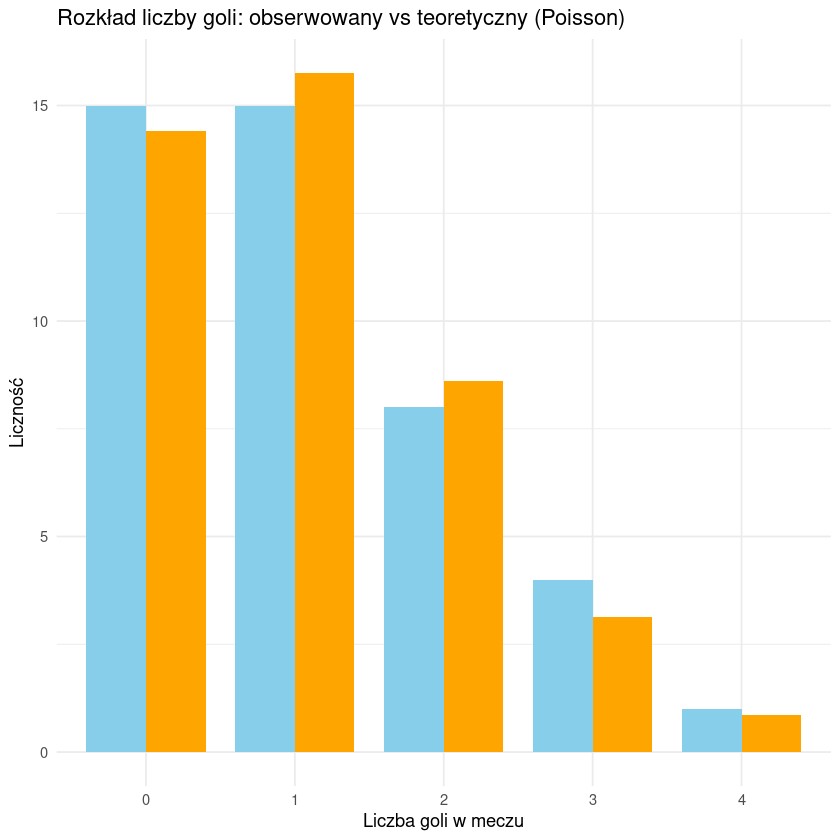

In [14]:
ggplot(df, aes(x = gole)) +
  geom_bar(aes(y = obserwowane), stat = "identity", fill = "skyblue", width = 0.4, position = position_nudge(x = -0.2)) +
  geom_bar(aes(y = oczekiwane), stat = "identity", fill = "orange", width = 0.4, position = position_nudge(x = 0.2)) +
  labs(
    title = "Rozkład liczby goli: obserwowany vs teoretyczny (Poisson)",
    x = "Liczba goli w meczu",
    y = "Liczność"
  ) +
  theme_minimal()

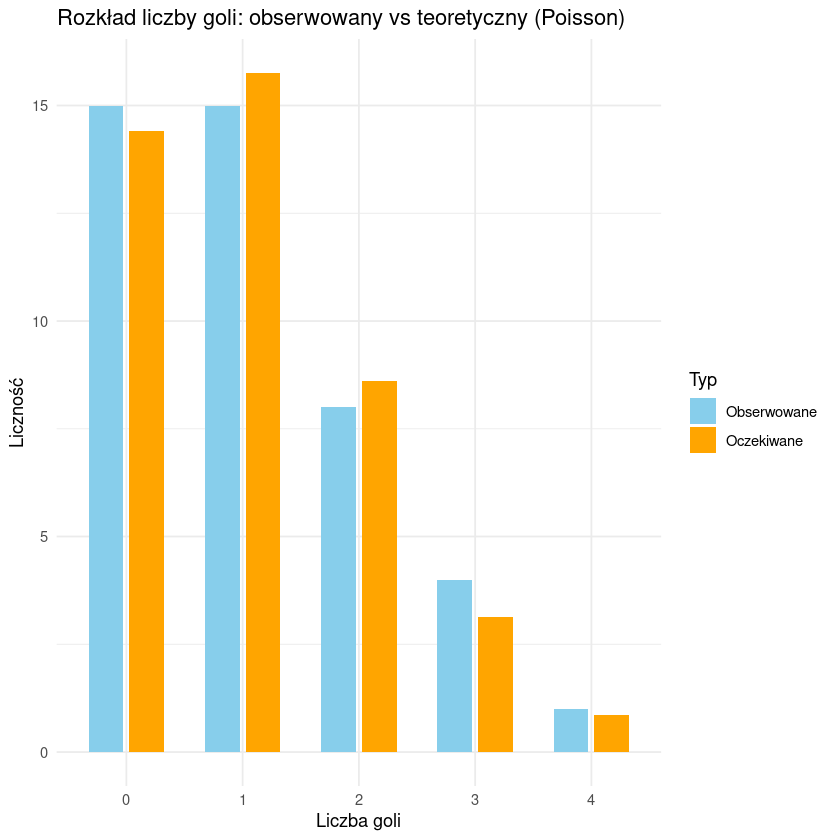

In [20]:
gole_kategorie <- as.character(0:max(gole))

obserwowane <- as.numeric(table(factor(gole, levels = 0:max(gole))))
oczekiwane <- exp

df_obserw <- data.frame(gole = gole_kategorie, liczność = obserwowane, typ = "Obserwowane")
df_oczek <- data.frame(gole = gole_kategorie, liczność = oczekiwane, typ = "Oczekiwane")
df_final <- rbind(df_obserw, df_oczek)

ggplot(df_final, aes(x = gole, y = liczność, fill = typ)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  scale_fill_manual(values = c("Obserwowane" = "skyblue", "Oczekiwane" = "orange")) +
  labs(
    title = "Rozkład liczby goli: obserwowany vs teoretyczny (Poisson)",
    x = "Liczba goli",
    y = "Liczność",
    fill = "Typ"
  ) +
  theme_minimal()

In [ ]:
## Teraz powinniśmy przeprowadzić test zgodności

In [21]:
# Oczekiwane liczności
oczekiwane

# Warunki:
sum(oczekiwane < 1)               # ile klas ma < 1
sum(oczekiwane < 5) / length(oczekiwane)  # jaki % ma < 5

0          1          2          3          4 
14.4136671 15.7544733  8.6100029  3.1369778  0.8571974

[1] 1

[1] 0.4

In [22]:
# bazując na tych danych dobrze by było połączyć 3 i 4
obs

gole
 0  1  2  3  4 
15 15  8  4  1 

In [23]:
obs["3+"] <- sum(obs["3"], obs["4"])
obs <- obs[c("0", "1", "2", "3+")]

In [24]:
obs

 0  1  2 3+ 
15 15  8  5 

In [25]:
oczekiwane

0          1          2          3          4 
14.4136671 15.7544733  8.6100029  3.1369778  0.8571974

In [27]:
oczekiwane["3+"] <- sum(oczekiwane[4:5])

In [28]:
oczekiwane

0          1          2          3          4         3+ 
14.4136671 15.7544733  8.6100029  3.1369778  0.8571974  3.9941752

In [29]:
oczekiwane <- oczekiwane[c(1:3, 6)]
names(oczekiwane) <- names(obs)

In [30]:
oczekiwane

0         1         2        3+ 
14.413667 15.754473  8.610003  3.994175

In [31]:
test_chikwadrat <- chisq.test(
  x = as.numeric(obs),
  p = oczekiwane / sum(oczekiwane),
  rescale.p = TRUE
)

Warning message in chisq.test(x = as.numeric(obs), p = oczekiwane/sum(oczekiwane), :
“Chi-squared approximation may be incorrect”


In [32]:
test_chikwadrat


	Chi-squared test for given probabilities

data:  as.numeric(obs)
X-squared = 0.3534, df = 3, p-value = 0.9497


In [33]:
rozn_bezwzgl <-  abs(obs - oczekiwane)
procent_dopasowanych <-mean(rozn_bezwzgl <= 1) * 100

In [34]:
cat("Dopasowanie (klas z różnicą ≤ 1):", round(procent_dopasowanych, 1), "%\n")

Dopasowanie (klas z różnicą ≤ 1): 75 %



### Wnioski zadanie 1
**Hipotezy statystyczne:**
- **H₀ (hipoteza zerowa):** rozkład liczby goli jest zgodny z rozkładem Poissona.
- **H₁ (hipoteza alternatywna):** rozkład liczby goli nie jest zgodny z rozkładem Poissona.

**Wniosek:**
Brak podstaw do odrzucenia hipotezy zerowej. p-value - bardzo duże / znacznie większe od 0.05.


**Przemyślenia:**
Być może dodatkowa weryfiakcja przy pomocy Monte Carlo?

## Zadanie 2: Weryfikacja zgodności z rozkładem chi-kwadrat


Na podstawie podanej próbki należy zweryfikować hipotezę, że cecha X ma rozkład chi-kwadrat.

---

1.0, 4.7, 5.2, 7.6, 2.9, 6.5, 4.3, 1.3, 1.6, 3.3, 0.5, 1.8, 15.4, 2.7, 9.6, 11.6, 23.2, 3.2, 3.4, 12.4, 19.5

---

**Część (a)**:
- Wykonać test Kołmogorowa-Smirnowa dla zgodności z rozkładem chi-kwadrat.
- Porównać dystrybuantę empiryczną z teoretyczną (na wykresie).

**Część (b)**:
- Porównać kwantyle empiryczne i teoretyczne za pomocą wykresu Q-Q.

**Hipotezy statystyczne**:
- **H₀ (hipoteza zerowa):** próba pochodzi z rozkładu X^2.
- **H₁ (hipoteza alternatywna):** próba nie pochodzi z rozkładu X^2


In [35]:
x <- c(1.0, 4.7, 5.2, 7.6, 2.9, 6.5, 4.3, 1.3, 1.6, 3.3,
       0.5, 1.8, 15.4, 2.7, 9.6, 11.6, 23.2, 3.2, 3.4, 12.4, 19.5)

In [36]:
n <- length(x)

In [37]:
n

[1] 21

### Z2.a test Kołmogorowa-Smirnowa dla zgodności z rozkładem chi-kwadrat

In [38]:
## est stopni swobody
df_hat <- mean(x)

In [39]:
df_hat

[1] 6.747619

In [40]:
ks.test(x, "pchisq", df = df_hat)



	Exact one-sample Kolmogorov-Smirnov test

data:  x
D = 0.30233, p-value = 0.03367
alternative hypothesis: two-sided


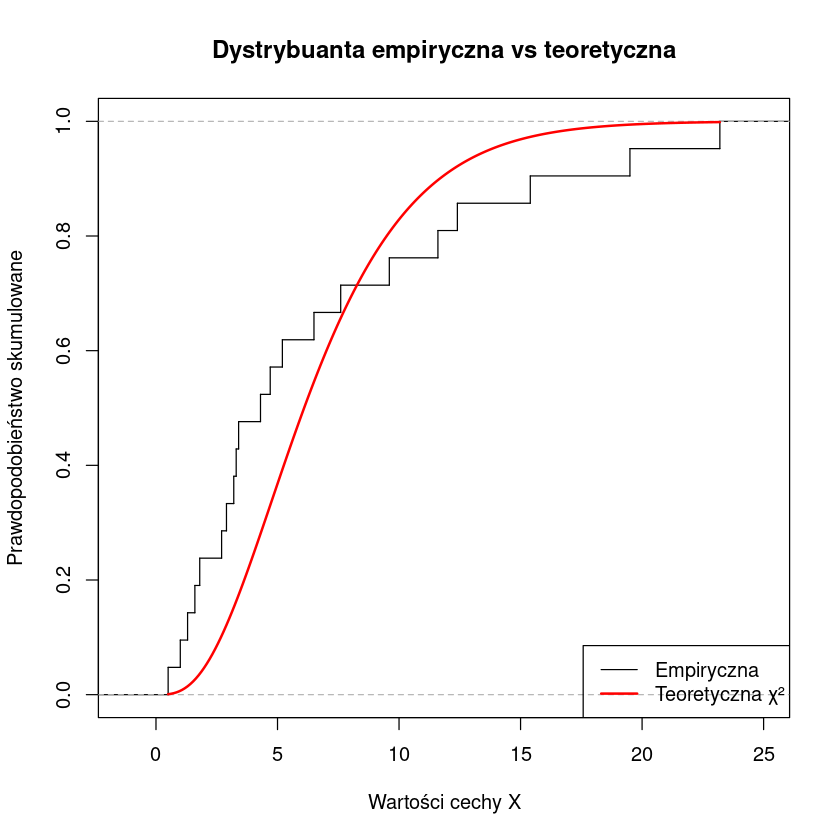

In [41]:

dystr_empiryczna <- ecdf(x)

# Zakres wartości
x_wykres <- seq(min(x), max(x), length.out = 200)

# Rysowanie wykresu
plot(dystr_empiryczna, verticals = TRUE, do.points = FALSE,
     main = "Dystrybuanta empiryczna vs teoretyczna",
     xlab = "Wartości cechy X", ylab = "Prawdopodobieństwo skumulowane")

# Teoretyczna dystrybuanta chi-kwadrat
lines(x_wykres, pchisq(x_wykres, df = df_hat),
      col = "red", lwd = 2)

legend("bottomright", legend = c("Empiryczna", "Teoretyczna χ²"),
       col = c("black", "red"), lwd = c(1, 2))

In [42]:
### Wnioski część (a)
Przy załozeniu progu istotności p-value == 0.05.
Test Kołmogorowa–Smirnowa wykazał p-wartość 0.033, co oznacza, że istnieją statystyczne podstawy do odrzucenia hipotezy zgodności z rozkładem chi-kwadrat

### Z2.b wykres kwantylowy (Q–Q plot)

In [43]:
# asc sort (kwantyle empiryczne)
x_empiryczne <- sort(x)

# # Kwantyle teoretyczne (z rozkładu chi-kwadrat o df_hat)
kwantyle_teoretyczne <- qchisq(ppoints(n), df = df_hat)

In [45]:
x_empiryczne

[1]  0.5  1.0  1.3  1.6  1.8  2.7  2.9  3.2  3.3  3.4  4.3  4.7  5.2  6.5  7.6
[16]  9.6 11.6 12.4 15.4 19.5 23.2

In [44]:
kwantyle_teoretyczne

[1]  1.544624  2.330965  2.874995  3.334769  3.752955  4.148835  4.533535
 [8]  4.914668  5.298222  5.689540  6.093943  6.517260  6.966415  7.450229
[15]  7.980691  8.575212  9.261088 10.085524 11.142662 12.671720 15.755016

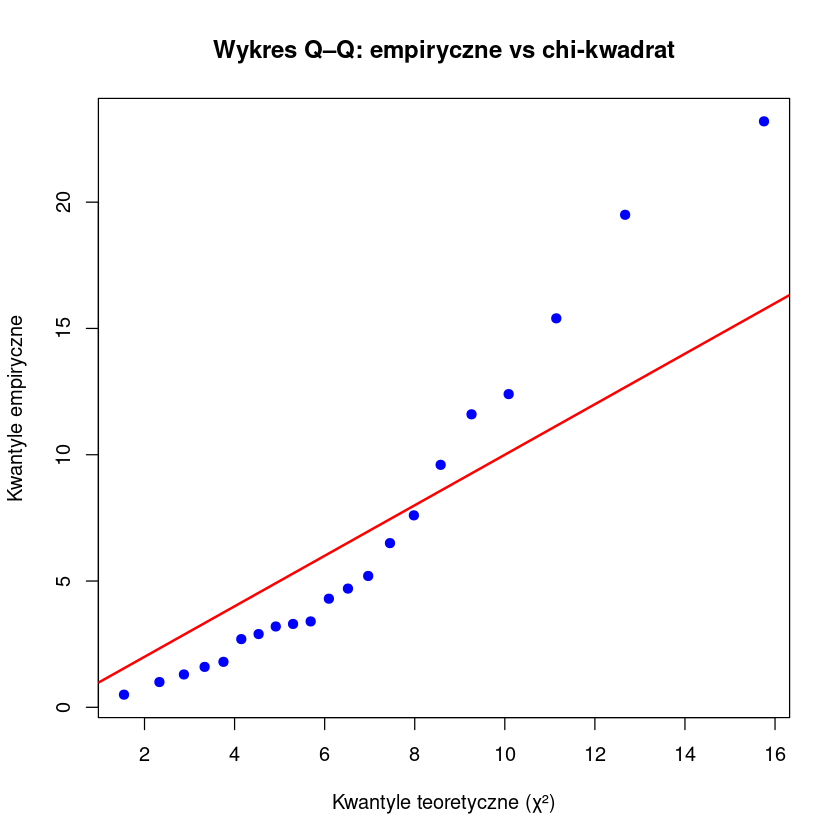

In [46]:
# Wykres Q-Q
qqplot(kwantyle_teoretyczne, x_empiryczne,
       main = "Wykres Q–Q: empiryczne vs chi-kwadrat",
       xlab = "Kwantyle teoretyczne (χ²)", ylab = "Kwantyle empiryczne",
       pch = 19, col = "blue")

abline(0, 1, col = "red", lwd = 2)

In [ ]:
### Z2.b Wnioski
Punkty znacząco odbiegają od linii idealnego dopasowania. Największe rozbieżoności występują w górnych kwantylach
Wykres Q-Q wspiera wynik testu KS z punktu a.

## Zadanie 3: Analiza wpływu nawozu na plony

### Polecenie:
W pewnym doświadczeniu rolniczym bada się plony nowej odmiany pszenicy (w kwintalach na hektar) w zależności od rodzaju nawozu. Należy:

(a) Zweryfikować hipotezę H₀, że rozkłady plonów dla każdego typu nawozu są jednakowe, wykorzystując test Kruskala–Wallisa.

(b) Obliczyć średnią rangę dla każdej grupy.

**Dane**:

---

- n1 = c(35, 32, 33.5, 36, 38, 30, 32.5, 31, 34)  
- n2 = c(28.5, 32, 33, 34, 28, 30.5, 30, 32)  
- n3 = c(26.5, 29, 33, 31, 28, 25.5, 29, 32, 29.5, 32)  
- n4 = c(30.5, 25.5, 32.5, 27, 34.5, 31)

---


### Z3.a Kruskal-Wallis - rozkłady plonów dla każdego typu nawozu są jednakowe

In [47]:
n1 <- c(35, 32, 33.5, 36, 38, 30, 32.5, 31, 34)
n2 <- c(28.5, 32, 33, 34, 28, 30.5, 30, 32)
n3 <- c(26.5, 29, 33, 31, 28, 25.5, 29, 32, 29.5, 32)
n4 <- c(30.5, 25.5, 32.5, 27, 34.5, 31)

In [48]:
plony <- c(n1, n2, n3, n4)

In [49]:
grupy <- factor(c(
  rep("n1", length(n1)),
  rep("n2", length(n2)),
  rep("n3", length(n3)),
  rep("n4", length(n4))
))

In [50]:
grupy

[1] n1 n1 n1 n1 n1 n1 n1 n1 n1 n2 n2 n2 n2 n2 n2 n2 n2 n3 n3 n3 n3 n3 n3 n3 n3
[26] n3 n3 n4 n4 n4 n4 n4 n4
Levels: n1 n2 n3 n4

In [51]:
plony

[1] 35.0 32.0 33.5 36.0 38.0 30.0 32.5 31.0 34.0 28.5 32.0 33.0 34.0 28.0 30.5
[16] 30.0 32.0 26.5 29.0 33.0 31.0 28.0 25.5 29.0 32.0 29.5 32.0 30.5 25.5 32.5
[31] 27.0 34.5 31.0

In [52]:
test_kw <- kruskal.test(plony ~ grupy)

In [53]:
test_kw


	Kruskal-Wallis rank sum test

data:  plony by grupy
Kruskal-Wallis chi-squared = 8.9766, df = 3, p-value = 0.0296


### Z3.a Wnioski

**Wyniki testu**:
- Statystyka testowa: χ² = 8.9766
- Stopnie swobody: df = 3
- p-wartość: 0.0296

**Hipotezy:**
- **H₀:** Rozkłady plonów w grupach n1, n2, n3 i n4 są identyczne.
- **H₁:** Co najmniej jedna grupa różni się pod względem rozkładu plonów.

**Wniosek:**
Ponieważ p-wartość < 0.05, odrzucamy hipotezę zerową. Istnieją statystycznie istotne różnice w rozkładach plonów między co najmniej dwoma rodzajami nawozów

### Z3.b średnia ranga dla każdej próbki

In [55]:
# plony – wszystkie obserwacje
# grupy – wektor etykiet grupowych

rangi <- rank(plony)

In [56]:
df_rangi <- data.frame(
  grupa = grupy,
  ranga = rangi
)

In [57]:
df_rangi

grupa,ranga
<fct>,<dbl>
n1,31.0
n1,20.0
n1,27.0
n1,32.0
n1,33.0
n1,11.5
n1,23.5
n1,16.0
n1,28.5


In [58]:
srednie_rangi <- aggregate(ranga ~ grupa, data = df_rangi, FUN = mean)

In [59]:
srednie_rangi

grupa,ranga
<fct>,<dbl>
n1,24.72222
n2,16.43750
n3,11.85000
n4,14.75000


### Z3.b Wnioski Średnie rangi dla każdej grupy nawozu

Najwyższą średnią rangę uzyskała grupa **n1**, co oznacza, że ta grupa miała generalnie **wyższe plony** niż pozostałe. 
Najniższą rangę uzyskała grupa **n3**, co sugeruje, że dawała najniższe plony.

Co potwierdza wynik testu Kruskala-Wallisa oraz jego interpretację z części [Z3a Wynik](#z3a-wnioski)

**Wilcoxon - które grupy się istotnie różniły?**


## Zadanie 4 : Charakter losowości i niezależność cyfr

### Polecenie:

**(a)**
Zbadać, czy poniższa próbka ma charakter losowy.

**(b)**
Niech X będzie pierwszą, a Y drugą cyfrą w rozważanych liczbach. Zbadać, czy X i Y są statystycznie niezależne.

**Dane (próbka losowa):**


---

35, 60, 148, 75, 92, 243, 37, 48, 95, 740, 154, 292, 334, 421, 15, 87, 36, 302, 250, 82, 101, 336, 230, 672, 55, 65, 17, 102, 21, 304, 640, 25, 354, 85, 340, 395, 720, 407, 230, 84, 14, 26, 35, 458, 370, 483, 310, 75, 300, 435, 92, 180, 405, 66, 315, 40, 532, 326, 604, 157, 640, 45, 31, 258, 625, 152, 193, 32, 488, 166, 10, 307, 260, 85, 450, 62, 345, 71, 165, 251, 236, 354, 58, 320, 81, 71, 45, 310, 345, 127, 476, 420, 150, 23, 48, 60, 95, 470, 92, 67, 325, 45, 157, 385, 125, 357, 582, 393, 175, 86, 830, 650, 40

---



### Z4.a Zbadać czy próbka ma charakter losowy?

Benford? histogram?

In [61]:
x <- c(35, 60, 148, 75, 92, 243, 37, 48, 95, 740, 154, 292, 334, 421, 15,
       87, 36, 302, 250, 82, 101, 336, 230, 672, 55, 65, 17, 102, 21,
       304, 640, 25, 354, 85, 340, 395, 720, 407, 230, 84, 14, 26, 35,
       458, 370, 483, 310, 75, 300, 435, 92, 180, 405, 66, 315, 40, 532,
       326, 604, 157, 640, 45, 31, 258, 625, 152, 193, 32, 488, 166, 10,
       307, 260, 85, 450, 62, 345, 71, 165, 251, 236, 354, 58, 320, 81,
       71, 45, 310, 345, 127, 476, 420, 150, 23, 48, 60, 95, 470, 92,
       67, 325, 45, 157, 385, 125, 357, 582, 393, 175, 86, 830, 650, 40)

In [62]:
# Benford
# Pierwsza cyfra
pierwsze_cyfry <- as.numeric(substring(as.character(x), 1, 1))

In [63]:
pierwsze_cyfry 

[1] 3 6 1 7 9 2 3 4 9 7 1 2 3 4 1 8 3 3 2 8 1 3 2 6 5 6 1 1 2 3 6 2 3 8 3 3 7
 [38] 4 2 8 1 2 3 4 3 4 3 7 3 4 9 1 4 6 3 4 5 3 6 1 6 4 3 2 6 1 1 3 4 1 1 3 2 8
 [75] 4 6 3 7 1 2 2 3 5 3 8 7 4 3 3 1 4 4 1 2 4 6 9 4 9 6 3 4 1 3 1 3 5 3 1 8 8
[112] 6 4

In [64]:
obs <- table(factor(pierwsze_cyfry, levels = 1:9))

In [66]:
obs


 1  2  3  4  5  6  7  8  9 
19 13 28 18  4 12  6  8  5 

In [67]:
# Warunki
# teoretyczne wystąpienie pierwszych cyfr
benford_probs <- log10(1 + 1 / (1:9))

In [68]:
benford_probs

[1] 0.30103000 0.17609126 0.12493874 0.09691001 0.07918125 0.06694679 0.05799195
[8] 0.05115252 0.04575749

In [69]:
# liczności
exp <- benford_probs * length(x)

In [70]:
exp

[1] 34.016390 19.898312 14.118077 10.950831  8.947481  7.564987  6.553090
[8]  5.780235  5.170596

In [71]:
chisq.test(x = obs, p = benford_probs, rescale.p = TRUE)


	Chi-squared test for given probabilities

data:  obs
X-squared = 33.448, df = 8, p-value = 5.112e-05


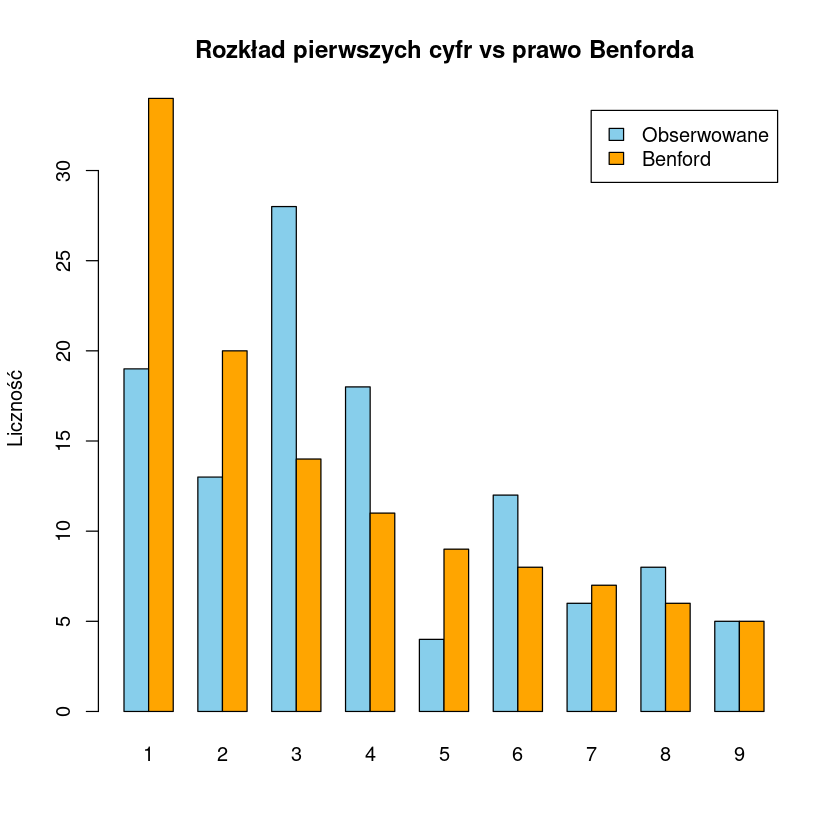

In [72]:
barplot(rbind(obs, round(exp)),
        beside = TRUE, col = c("skyblue", "orange"),
        names.arg = 1:9, legend = c("Obserwowane", "Benford"),
        main = "Rozkład pierwszych cyfr vs prawo Benforda",
        ylab = "Liczność")

In [77]:
install.packages("e1071")

Installing package into ‘/home/kotmin/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [78]:
# POM

srednia <- mean(x)
mediana <- median(x)
wariancja <- var(x)
odchylenie <- sd(x)


library(e1071)
skosnosc <- skewness(x)


pom <- mean(x, trim = 0.1)


data.frame(
  Średnia = round(srednia, 2),
  Mediana = round(mediana, 2),
  POM_10proc = round(pom, 2),
  Odchylenie = round(odchylenie, 2),
  Skośność = round(skosnosc, 2)
)


Średnia,Mediana,POM_10proc,Odchylenie,Skośność
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
235.27,166,209.91,197.8,0.88


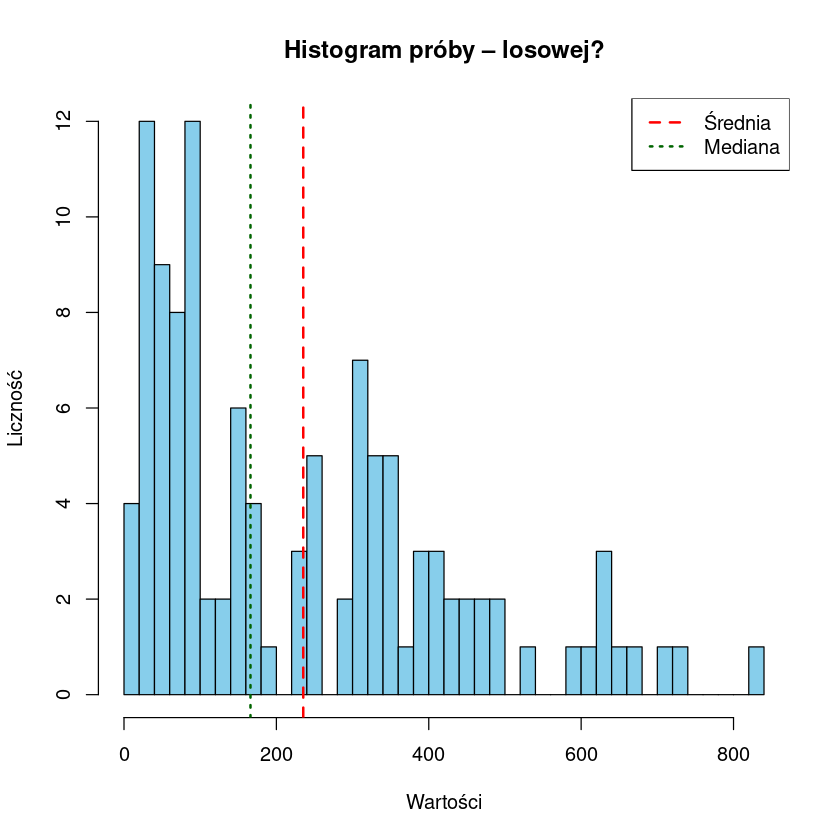

In [80]:
## dodatkowo możemy zrobić histogram

hist(x,
     breaks = 30,
     col = "skyblue",
     main = "Histogram próby – losowej?",
     xlab = "Wartości",
     ylab = "Liczność")

# Dodajemy linię średniej
abline(v = mean(x), col = "red", lwd = 2, lty = 2)

# Dodajemy linię mediany
abline(v = median(x), col = "darkgreen", lwd = 2, lty = 3)

# Legenda
legend("topright",
       legend = c("Średnia", "Mediana"),
       col = c("red", "darkgreen"),
       lwd = 2,
       lty = c(2, 3))

### 4a Wnioski

Zostały sprawdzone warunki czy można wykonać testy zgodności z prawem Benforda.

Rozkład jest skośny dodatnio(prawostronnie) średnia > mediana.

Wysoka wartość współczynnika skośności i spora różnica między średnią, a medianą sugerują, że dane są **silnie niesymetryczne** i mogą pochodzić z próbki zdominowanej przez duże wartości.

**Wniosek z testu zgodności z prawem Benforda:**
Test chi-kwadrat dał wynik:
data:  obs
X-squared = 33.448, df = 8, p-value = 5.112e-05

Odrzucamy hipotezę zgodności z rozkładem Benforda – dane **nie mają losowego charakteru**

Histogram, linie statystyk, klasyczne statystyki opisowe, obserwowana dodatnia skośność oraz test Benforda jednoznacznie wskazują, że dane **nie są naturalnie rozłożone ani całkiem losowe**.


### Z4.b XY statystycznie niezależne

In [120]:
# polecenie mówiło o cyfrach - chcemy mieć możliwość uzyskania X oraz Y
x_filtr <- x[x >= 10]

In [121]:
x_filtr

[1]  35  60 148  75  92 243  37  48  95 740 154 292 334 421  15  87  36 302
 [19] 250  82 101 336 230 672  55  65  17 102  21 304 640  25 354  85 340 395
 [37] 720 407 230  84  14  26  35 458 370 483 310  75 300 435  92 180 405  66
 [55] 315  40 532 326 604 157 640  45  31 258 625 152 193  32 488 166  10 307
 [73] 260  85 450  62 345  71 165 251 236 354  58 320  81  71  45 310 345 127
 [91] 476 420 150  23  48  60  95 470  92  67 325  45 157 385 125 357 582 393
[109] 175  86 830 650  40

In [122]:
length(x_filtr)

[1] 113

In [123]:
cyfra_X <- as.numeric(substr(as.character(x_filtr), 1, 1))
cyfra_Y <- as.numeric(substr(as.character(x_filtr), 2, 2))

In [124]:
cyfra_X 

[1] 3 6 1 7 9 2 3 4 9 7 1 2 3 4 1 8 3 3 2 8 1 3 2 6 5 6 1 1 2 3 6 2 3 8 3 3 7
 [38] 4 2 8 1 2 3 4 3 4 3 7 3 4 9 1 4 6 3 4 5 3 6 1 6 4 3 2 6 1 1 3 4 1 1 3 2 8
 [75] 4 6 3 7 1 2 2 3 5 3 8 7 4 3 3 1 4 4 1 2 4 6 9 4 9 6 3 4 1 3 1 3 5 3 1 8 8
[112] 6 4

In [125]:
cyfra_Y 

[1] 5 0 4 5 2 4 7 8 5 4 5 9 3 2 5 7 6 0 5 2 0 3 3 7 5 5 7 0 1 0 4 5 5 5 4 9 2
 [38] 0 3 4 4 6 5 5 7 8 1 5 0 3 2 8 0 6 1 0 3 2 0 5 4 5 1 5 2 5 9 2 8 6 0 0 6 5
 [75] 5 2 4 1 6 5 3 5 8 2 1 1 5 1 4 2 7 2 5 3 8 0 5 7 2 7 2 5 5 8 2 5 8 9 7 6 3
[112] 5 0

In [126]:
# tablica liczności / kontyngencji
tablica_xy <- table(X = cyfra_X, Y = cyfra_Y)

In [127]:
tablica_xy

   Y
X   0 1 2 3 4 5 6 7 8 9
  1 3 0 2 0 2 6 2 2 1 1
  2 0 1 0 4 1 4 2 0 0 1
  3 4 4 4 2 3 5 1 2 1 2
  4 4 0 2 1 0 5 0 2 4 0
  5 0 0 0 1 0 1 0 0 2 0
  6 3 0 2 0 2 2 1 2 0 0
  7 0 2 1 0 1 2 0 0 0 0
  8 0 1 1 1 1 2 1 1 0 0
  9 0 0 3 0 0 2 0 0 0 0

In [128]:
## test wstpępny
test_chi <- chisq.test(tablica_xy)

Warning message in chisq.test(tablica_xy):
“Chi-squared approximation may be incorrect”


In [129]:
test_chi


	Pearson's Chi-squared test

data:  tablica_xy
X-squared = 83.349, df = 72, p-value = 0.1698


In [130]:
oczekiwane <- test_chi$expected

In [131]:
oczekiwane

,0,1,2,3,4,5,6,7,8,9
1,2.3539823,1.3451327,2.5221239,1.5132743,1.6814159,4.876106,1.1769912,1.5132743,1.3451327,0.6725664
2,1.6106195,0.9203540,1.7256637,1.0353982,1.1504425,3.336283,0.8053097,1.0353982,0.9203540,0.4601770
3,3.4690265,1.9823009,3.7168142,2.2300885,2.4778761,7.185841,1.7345133,2.2300885,1.9823009,0.9911504
4,2.2300885,1.2743363,2.3893805,1.4336283,1.5929204,4.619469,1.1150442,1.4336283,1.2743363,0.6371681
5,0.4955752,0.2831858,0.5309735,0.3185841,0.3539823,1.026549,0.2477876,0.3185841,0.2831858,0.1415929
6,1.4867257,0.8495575,1.5929204,0.9557522,1.0619469,3.079646,0.7433628,0.9557522,0.8495575,0.4247788
7,0.7433628,0.4247788,0.7964602,0.4778761,0.5309735,1.539823,0.3716814,0.4778761,0.4247788,0.2123894
8,0.9911504,0.5663717,1.0619469,0.6371681,0.7079646,2.053097,0.4955752,0.6371681,0.5663717,0.2831858
9,0.6194690,0.3539823,0.6637168,0.3982301,0.4424779,1.283186,0.3097345,0.3982301,0.3539823,0.1769912


In [132]:
str(test_chi)

List of 9
 $ statistic: Named num 83.3
  ..- attr(*, "names")= chr "X-squared"
 $ parameter: Named int 72
  ..- attr(*, "names")= chr "df"
 $ p.value  : num 0.17
 $ method   : chr "Pearson's Chi-squared test"
 $ data.name: chr "tablica_xy"
 $ observed : 'table' int [1:9, 1:10] 3 0 4 4 0 3 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ X: chr [1:9] "1" "2" "3" "4" ...
  .. ..$ Y: chr [1:10] "0" "1" "2" "3" ...
 $ expected : num [1:9, 1:10] 2.354 1.611 3.469 2.23 0.496 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ X: chr [1:9] "1" "2" "3" "4" ...
  .. ..$ Y: chr [1:10] "0" "1" "2" "3" ...
 $ residuals: 'table' num [1:9, 1:10] 0.421 -1.269 0.285 1.185 -0.704 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ X: chr [1:9] "1" "2" "3" "4" ...
  .. ..$ Y: chr [1:10] "0" "1" "2" "3" ...
 $ stdres   : 'table' num [1:9, 1:10] 0.493 -1.441 0.351 1.381 -0.766 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ X: chr [1:9] "1" "2" "3" "4" ...
  .. ..$ Y: chr [1:10] "0" "1" "2" "3" ...
 - 

In [133]:
sum(oczekiwane < 1)

[1] 48

In [134]:
mean(oczekiwane < 5) * 100

[1] 98.88889

In [135]:
test_chi$stdres

   Y
X             0           1           2           3           4           5
  1  0.49321893 -1.31917508 -0.38707207 -1.40590728  0.28215151  0.64723735
  2 -1.44130973  0.09155254 -1.49948971  3.22830403 -0.15617009  0.44801254
  3  0.35117240  1.71413865  0.18186204 -0.18517663  0.40057528 -1.09045828
  4  1.38098686 -1.27721502 -0.29500894 -0.41171750 -1.44176693  0.22396027
  5 -0.76577712 -0.56209059 -0.79668852  1.28129396 -0.63450837 -0.03094415
  6  1.40249851 -1.01139197  0.36634231 -1.07788826  1.00849829 -0.75476039
  7 -0.94660627  2.57663005  0.25167546 -0.74050423  0.69283364  0.44201439
  8 -1.10340764  0.62009184 -0.06696362  0.49152489  0.37713332 -0.04458740
  9 -0.86011945 -0.63133910  3.14983353 -0.67284795 -0.71267863  0.75073855
   Y
X             6           7           8           9
  1  0.85877519  0.45219240 -0.33847255  0.44571472
  2  1.46116534 -1.12749723 -1.05794050  0.86129938
  3 -0.66393702 -0.18517663 -0.83451487  1.18963121
  4 -1.18907640  0.537

In [136]:
# da się tu znaleźć wartości większe od 2

In [137]:
# w każdytm razie liczności w klasach są mniejsze od 5, test może stracić na skuteczności. Test wykazał p-value < 0.05
# spróbujemy wykorzystać test Fishera

fisher.test(tablica_xy,simulate.p.value=TRUE) 


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  tablica_xy
p-value = 0.3628
alternative hypothesis: two.sided


In [138]:
# można spróbować symulacji Monte Carlo
chisq.test(tablica_xy, simulate.p.value = TRUE, B = 10000)


	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  tablica_xy
X-squared = 83.349, df = NA, p-value = 0.1646


### 4.b Wnioski

Elementy podzielono zgodnie z poleceniem, stworzono tablice kontyngencji.

Sprawdzono warunki zastosowania klasycznego testu chi-kwadrat:
  - **48 komórek** (spośród 90) miało oczekiwaną liczność **mniejszą niż 1**

    
  - **98.9% wszystkich komórek** miało oczekiwaną liczność **mniejszą niż 5**


Wynik testu chi-kwadrat mógł zostać uznany za niewiarygodny. Sugerował **statystyczną niezależność**



**Hipotezy:**


- **H₀ (hipoteza zerowa):** Cyfry X i Y są niezależne — rozkład drugiej cyfry nie zależy od pierwszej.

  
- **H₁ (hipoteza alternatywna):** Cyfry X i Y są zależne — rozkład drugiej cyfry zależy od pierwszej.



Wykonano dwa alternatywne testy nieparametryczne:
1. fisher (2000 permutacji) p ~0.36

   
2. chi-sqrt z symulacją Monte Carlo, p~0.16



W obu przypadkach p-wartość jest większa niż 0.05, **brak podstaw do odrzucenia hipotezy zerowej**.

Cyfry X i Y mogą być uznane za **statystycznie niezależne** na podstawie dostępnych danych.


## Zadanie 5: Piramida demograficzna USA 1948

### Polecenie zad 5
W pakiecie latticeExtra znajduje się ramka danych USAge.df
zawierająca wielkość populacji USA w latach 1900-1979 z podziałem
na wiek i płeć.


Sporządzić wykres piramidowy/demograficzny przedstawiający
strukturę wieku z podziałem na płeć dla roku 1948. Przyjąć
następujący podział na kategorie wiekowe


---

wiek=c("0-5","6-11","12-17","18-23","24-29","30-35","36-41",
"42-47","48-53","54-59","60-65","66-71","72 i więcej")

---


**Uwaga.** Wykorzystać funkcję **pyramid.plot** z pakietu **plotrix** lub też
funkcje dostępne w innych pakietach.


In [142]:
if (!require(plotrix)) install.packages("plotrix")

Loading required package: plotrix



Looks like it needs external dependencies to run latticeExtra

'''bash
sudo apt-get update
sudo apt-get install -y \
    libjpeg-dev \
    libpng-dev \
    libeigen3-dev \
    libproj-dev \
    libgeos-dev \
    libgdal-dev \
    libtiff5-dev \
    libglpk-dev \
    libx11-dev \
    libxt-dev

'''

```bash
sudo apt update
sudo apt install -y build-essential \
    libjpeg-dev libpng-dev libtiff5-dev \
    libeigen3-dev libgdal-dev libgeos-dev \
    libproj-dev libglpk-dev \
    libxt-dev libx11-dev \
    libcurl4-openssl-dev libssl-dev \
    libxml2-dev

sudo apt update
sudo apt install -y build-essential \
  libeigen3-dev libgsl-dev libblas-dev liblapack-dev \
  libjpeg-dev libpng-dev libtiff5-dev libcurl4-openssl-dev libssl-dev libxml2-dev


```


Jak się okazuje brakującym elementem był kompilator fortrana
```bash
sudo apt install gfortran

```

In [148]:
install.packages("latticeExtra", dependencies = TRUE)


Installing package into ‘/home/kotmin/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘SparseM’, ‘MatrixModels’, ‘interp’, ‘maps’, ‘mapproj’, ‘deldir’, ‘quantreg’, ‘zoo’


Warning message in install.packages("latticeExtra", dependencies = TRUE):
“installation of package ‘RcppEigen’ had non-zero exit status”
Warning message in install.packages("latticeExtra", dependencies = TRUE):
“installation of package ‘SparseM’ had non-zero exit status”
Warning message in install.packages("latticeExtra", dependencies = TRUE):
“installation of package ‘deldir’ had non-zero exit status”
Warning message in install.packages("latticeExtra", dependencies = TRUE):
“installation of package ‘interp’ had non-zero exit status”
Warning message in install.packages("latticeExtra", dependencies = TRUE):
“installation of package ‘quantreg’ had non-zero exit status”
Warning message in install.packages("latticeExtra", dependencies = TRUE):
“installation of p

In [146]:
if (!require(latticeExtra)) install.packages("latticeExtra", dependencies = TRUE)

Loading required package: latticeExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘latticeExtra’”
Installing package into ‘/home/kotmin/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘interp’


Warning message in install.packages("latticeExtra"):
“installation of package ‘deldir’ had non-zero exit status”
Warning message in install.packages("latticeExtra"):
“installation of package ‘RcppEigen’ had non-zero exit status”
Warning message in install.packages("latticeExtra"):
“installation of package ‘interp’ had non-zero exit status”
Warning message in install.packages("latticeExtra"):
“installation of package ‘latticeExtra’ had non-zero exit status”


In [150]:
install.packages(c('deldir', 'RcppEigen'))


Installing packages into ‘/home/kotmin/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("deldir", "RcppEigen")):
“installation of package ‘deldir’ had non-zero exit status”
Warning message in install.packages(c("deldir", "RcppEigen")):
“installation of package ‘RcppEigen’ had non-zero exit status”


In [151]:
install.packages('SparseM')


Installing package into ‘/home/kotmin/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

Warning message in install.packages("SparseM"):
“installation of package ‘SparseM’ had non-zero exit status”


In [144]:
library(plotrix)

In [152]:
library(latticeExtra)


Loading required package: lattice


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer




In [153]:
# wczytanie danych
data("USAge.df")

In [154]:
dane_1948 <- subset(USAge.df, Year == 1948)

In [155]:
dane_1948

,Age,Sex,Year,Population
,<dbl>,<fct>,<dbl>,<dbl>
7201,0,Male,1948,1.622336
7202,1,Male,1948,1.795136
7203,2,Male,1948,1.359864
7204,3,Male,1948,1.401297
7205,4,Male,1948,1.424228
7206,5,Male,1948,1.469383
7207,6,Male,1948,1.291849
7208,7,Male,1948,1.206605
7209,8,Male,1948,1.144003


In [156]:
przedzialy <- cut(
  dane_1948$Age,
  breaks = c(0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, Inf),
  labels = c("0-5", "6-11", "12-17", "18-23", "24-29", "30-35", "36-41",
             "42-47", "48-53", "54-59", "60-65", "66-71", "72 i więcej"),
  right = FALSE
)

In [157]:
dane_1948$wiek_kategoria <- przedzialy

In [158]:
# Agregujemy populację według płci i kategorii wiekowej
tabela <- aggregate(Population ~ Sex + wiek_kategoria, data = dane_1948, sum)

In [159]:
kobiety <- tabela$Population[tabela$Sex == "Female"]
mezczyzni <- tabela$Population[tabela$Sex == "Male"]

In [160]:
kobiety

[1] 8.732111 6.787291 6.377272 6.985320 7.389165 6.900891 6.455141 5.659599
 [9] 5.029009 4.230171 3.452066 2.634169 0.932342

In [161]:
# Upewniamy się, że obie grupy są w tej samej kolejności wiekowej
kategorie <- levels(tabela$wiek_kategoria)

In [163]:
# jeśli występuje N/A zastępujemy to 0
kobiety[is.na(kobiety)] <- 0
mezczyzni[is.na(mezczyzni)] <- 0

10 10 


[1] 5.1 4.1 4.1 2.1

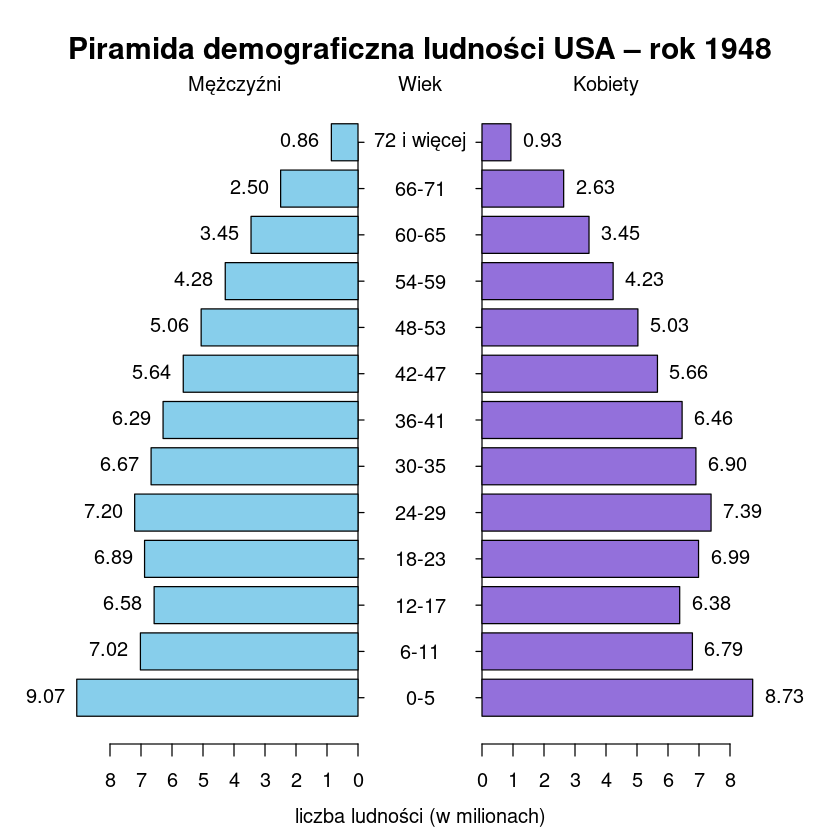

In [177]:
pyramid.plot(
  lx = mezczyzni,
  rx = kobiety,
  labels = kategorie,
  main = "",  #
  lxcol = "#87CEEB",     # błękitny
  rxcol = "#9370DB",     # fioletowy
  unit = "liczba ludności (w milionach)",
  gap = 2,               
  top.labels = c("Mężczyźni", "Wiek", "Kobiety"),
  labelcex = 1.0,
  ndig = 2,
  # xlim = maks  # przeskalowanie zakresu do danych - nawet w dokumentacji nie ma sensownego opisu jak to symetrycznie ustawić
    show.values = TRUE

)


title(main = "Piramida demograficzna ludności USA – rok 1948", cex.main = 1.5)


### Z5 Wnioski
Źródło: `USAge.df`, pakiet `latticeExtra`.


Zainstalowanie pakietu 'latticeExtra' wymagało niestandardowego podejscia. Być może korzystanie z **anaconda** ułatwiłoby ten proces. Głównym sprawcą błędów być brak kompilatora **fortrana**.



Widzimy tutaj specyficzną dysproporcję - szeroka podstawa wykresu. Może być to obraz początku tzw. **baby boom**  będącego niejako naturalną reakcją na powojenną stabilizację społeczną.


Wąska grupa 6-11 - skutek WW2


Da się również zauważyć większą liczbę kobiet w grupach 65+





## Zadanie 6: Zakład tkalniczy

Zakład tkalniczy produkuje tkaninę o nominalnej długości 50 m. Nabywca zmierzył długości i otrzymał dane w formie przedziałów:

| Przedział długości (m) | Liczba obserwacji |
|------------------------|-------------------|
| 45–47                  | 4                 |
| 47–49                  | 10                |
| 49–51                  | 38                |
| 51–53                  | 20                |
| 53–55                  | 12                |
| 55–57                  | 8                 |


Zbadać, czy długość tej tkaniny może być modelowana za pomocą
**rozkładu normalnego**. Parametry rozkładu oszacować na podstawie
danych.

**Hipotezy statystyczne:**

- **H₀ (hipoteza zerowa):** Długość tkaniny ma rozkład zgodny z rozkładem normalnym.
- **H₁ (hipoteza alternatywna):** Długość tkaniny nie ma rozkładu zgodnego z rozkładem normalnym.


In [179]:
# Środki klas
srodki <- c(46, 48, 50, 52, 54, 56)

In [180]:
licznosci <- c(4, 10, 38, 20, 12, 8)

In [181]:
n <- sum(licznosci)

In [182]:
n

[1] 92

In [183]:
srednia_hat <- sum(srodki * licznosci) / n # μ̂

In [184]:
srednia_hat

[1] 51.08696

In [185]:
# Odchylenie standardowe (σ̂)
wariancja_hat <- sum(licznosci * (srodki - srednia_hat)^2) / n
odch_stand_hat <- sqrt(wariancja_hat)

In [186]:
odch_stand_hat

[1] 2.45681

In [187]:
wariancja_hat

[1] 6.035917

In [188]:
srednia_hat

[1] 51.08696

In [189]:
# granice przedziałów
dolne <- c(45, 47, 49, 51, 53, 55)
gorne <- c(47, 49, 51, 53, 55, 57)

In [190]:
# Teoretyczne prawdopodobieństwa dla każdego przedziału
proby <- pnorm(gorne, mean = srednia_hat, sd = odch_stand_hat) -
         pnorm(dolne, mean = srednia_hat, sd = odch_stand_hat)

In [191]:
proby

[1] 0.04149031 0.14970926 0.28806944 0.29603006 0.16247716 0.04756346

In [192]:
# Oczekiwane liczności
oczekiwane <- proby * n

In [194]:
tabela <- data.frame(
  Przedzial = paste(dolne, gorne, sep = "-"),
  Prawdopodobienstwo = proby,
  Oczekiwane = oczekiwane
)

In [208]:
tabela$Obserwowane <- licznosci

In [205]:
install.packages("tidyr", dependencies = TRUE)

Installing package into ‘/home/kotmin/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘generics’, ‘rex’, ‘httr’, ‘dplyr’, ‘covr’, ‘data.table’, ‘repurrrsive’




In [209]:
library(ggplot2)
library(tidyr)

In [210]:
# Z długiego formatu do wykresu
tabela_long <- pivot_longer(
  tabela,
  cols = c("Obserwowane", "Oczekiwane"),
  names_to = "Typ",
  values_to = "Liczba"
)


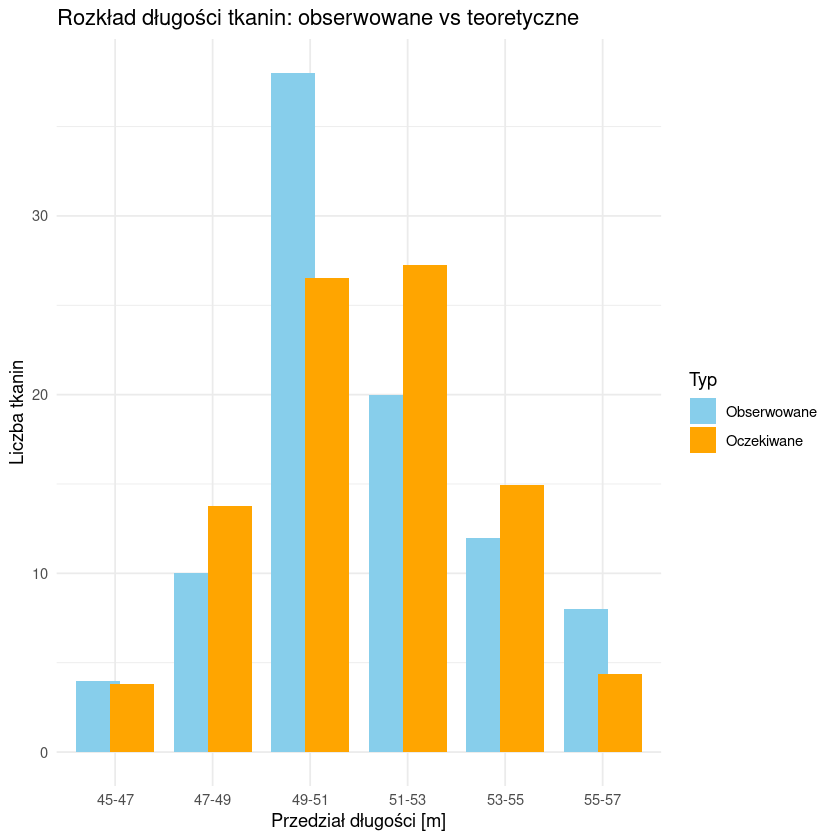

In [211]:
ggplot(tabela_long, aes(x = Przedzial, y = Liczba, fill = Typ)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = c("Obserwowane" = "skyblue", "Oczekiwane" = "orange")) +
  labs(
    title = "Rozkład długości tkanin: obserwowane vs teoretyczne",
    x = "Przedział długości [m]",
    y = "Liczba tkanin",
    fill = "Typ"
  ) +
  theme_minimal()


In [215]:
# spróbujmy jeszcze dodać poglądowo krzywą rozkładu normalnego
# Gęstość z rozkładu normalnego przeskalowana do sumy tkanin
gestosc_df <- data.frame(
  Przedzial = tabela$Przedzial,
  x = srodki,
  y = dnorm(srodki, mean = srednia_hat, sd = odch_stand_hat) * sum(licznosci) * 2  # 2 = szerokość klasy
)

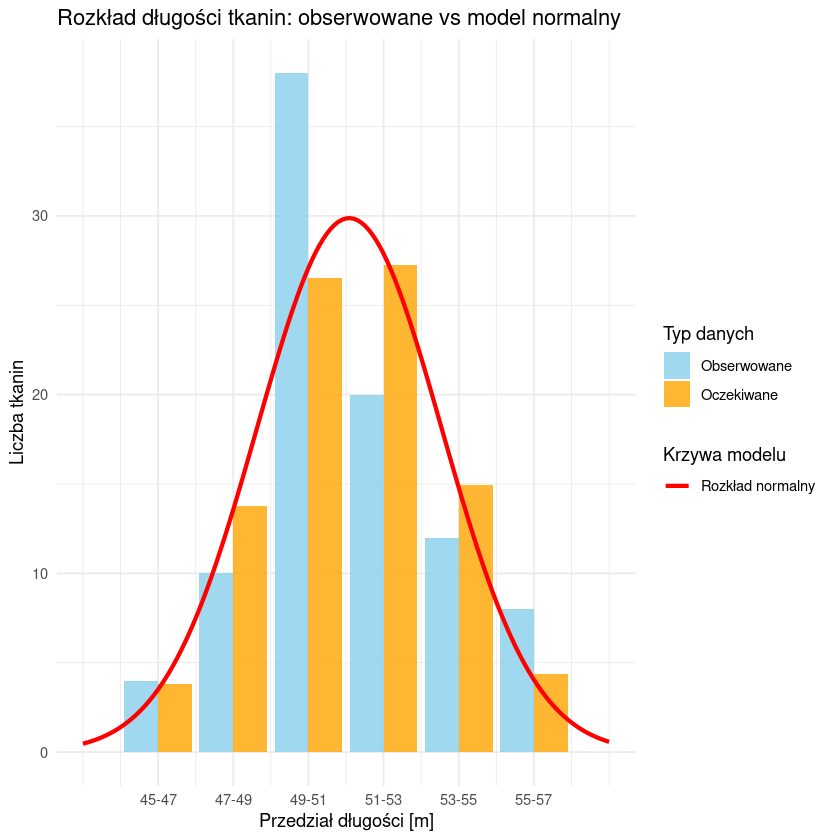

In [221]:
# Dane z etykietami
df_obs <- data.frame(x = srodki, y = licznosci, grupa = "Obserwowane", Przedzial = tabela$Przedzial)
df_exp <- data.frame(x = srodki, y = oczekiwane, grupa = "Oczekiwane", Przedzial = tabela$Przedzial)
df_norm <- data.frame(x = x_gestosc, y = y_gestosc, grupa = "Rozkład normalny")

# słupki razem
df_bars <- rbind(df_obs, df_exp)


ggplot() +
  geom_col(data = df_bars, aes(x = x, y = y, fill = grupa), width = 1.8, position = position_dodge(width = 1.8), alpha = 0.8) +
  geom_line(data = df_norm, aes(x = x, y = y, color = grupa), size = 1.2) +
  scale_fill_manual(
    values = c("Obserwowane" = "skyblue", "Oczekiwane" = "orange"),
    guide = guide_legend(order = 1)
  ) +
  scale_color_manual(
    values = c("Rozkład normalny" = "red"),
    guide = guide_legend(order = 2)
  ) +
  scale_x_continuous(
    name = "Przedział długości [m]",
    breaks = srodki,
    labels = tabela$Przedzial
  ) +
  labs(
    title = "Rozkład długości tkanin: obserwowane vs model normalny",
    y = "Liczba tkanin",
    fill = "Typ danych",
    color = "Krzywa modelu"
  ) +
  theme_minimal()


In [195]:
# Zaokrąglenie tylko kolumn numerycznych
tabela$Prawdopodobienstwo <- round(tabela$Prawdopodobienstwo, 4)
tabela$Oczekiwane <- round(tabela$Oczekiwane, 2)

In [196]:
tabela

Przedzial,Prawdopodobienstwo,Oczekiwane
<chr>,<dbl>,<dbl>
45-47,0.0415,3.82
47-49,0.1497,13.77
49-51,0.2881,26.50
51-53,0.2960,27.23
53-55,0.1625,14.95
55-57,0.0476,4.38


In [197]:
sum(tabela$Prawdopodobienstwo)

[1] 0.9854

In [199]:
# zakładamy że to błąd przybliżenia ~98% jest akceptowalne

In [200]:
# chi-sqrt

## warunki
sum(tabela$Oczekiwane < 1)
mean(tabela$Oczekiwane < 5) * 100

[1] 0

[1] 33.33333

In [201]:
## przy chsqrt Pearsona możemy mieć problem z licznościami (>25% klas)
# pomimo tego zobaczmy co nam pokaże
test_chi <- chisq.test(x = oczekiwane, p = tabela$Oczekiwane / sum(tabela$Oczekiwane), rescale.p = TRUE)
test_chi


Warning message in chisq.test(x = oczekiwane, p = tabela$Oczekiwane/sum(tabela$Oczekiwane), :
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  oczekiwane
X-squared = 8.2373e-06, df = 5, p-value = 1


In [203]:
# alt z MonteCarlo?
chisq.test(oczekiwane, p = tabela$Oczekiwane / sum(tabela$Oczekiwane),
           rescale.p = TRUE, simulate.p.value = TRUE, B = 10000)


Warning message in matrix(sample.int(nx, B * n, TRUE, prob = p), nrow = n):
“data length [906512] is not a sub-multiple or multiple of the number of rows [90]”



	Chi-squared test for given probabilities with simulated p-value (based
	on 10000 replicates)

data:  oczekiwane
X-squared = 8.2373e-06, df = NA, p-value = 1.007


In [ ]:
# nie mamy podstaw do odrzucenia h0

In [222]:
# łączenie klas (pierwszych i ostatnich)
nowe_przedzialy <- c("45–49", "49–51", "51–53", "53–57")
licznosci_polaczone <- c(4 + 10, 38, 20, 12 + 8)
oczekiwane_polaczone <- c(3.82 + 13.77, 26.50, 27.23, 14.95 + 4.38)

In [223]:
# sprawdzenie warunków dla chi-kwadrat z nowymi przedziałami
sum(oczekiwane_polaczone < 1)
mean(oczekiwane_polaczone < 5) * 100

[1] 0

[1] 0

In [224]:
test_chikwadrat_polaczony <- chisq.test(
  x = licznosci_polaczone,
  p = oczekiwane_polaczone / sum(oczekiwane_polaczone),
  rescale.p = TRUE
)

In [225]:
test_chikwadrat_polaczony


	Chi-squared test for given probabilities

data:  licznosci_polaczone
X-squared = 7.5339, df = 3, p-value = 0.05669


In [226]:
# technicznie rzecz biorąc brakuje podstaw do odrzucenia hipotezy zerowej

### Z6 Wnioski

**ipotezy statystyczne:**


- **H₀ (hipoteza zerowa):** długość tkanin jest zgodna z rozkładem normalnym,

- **H₁ (hipoteza alternatywna):** długość tkanin nie jest zgodna z rozkładem normalnym.


Nie mniej porównując wizualnie rozkłady teoretyczne z empirycznymi oraz krzywą normalną możemy zauważyć, że liczność przedziału 49-51 mogła by być głównym powodem **braku podstaw do odrzucenia h0**

Wartości testu chi-kwadrat Pearsona dla połączonych klasy przyjęły p-value bardzo bliskie progu odrzucenia.

Na poziomie istotności **α = 0.05** brak podstaw do odrzucenia hipotezy H₀.  
Rozkład długości tkanin można uznać za **zgodny z rozkładem normalnym**.  Przy obecnym stopniu agregacji danych

Po połączeniu klas dla spełnienia warunków testu, brak podstaw do odrzucenia hipotezy o zgodności z rozkładem normalnym. Wynik sugeruje, że model normalny może być użytecznym przybliżeniem dla długości tkaniny — przy założeniu umiarkowanego poziomu szczegółowości


